# ACIS Insurance Risk Analytics – Task 1

**Objective:** The goal of this notebook is to understand the dataset, check for data quality issues, and perform Exploratory Data Analysis (EDA) to derive meaningful insights.

## Setup & Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src directory to the path to import custom modules
sys.path.append(os.path.abspath('../src'))

from data_loader import load_raw_data, preview_data
from eda import summarize_numeric, missing_value_report, top_creative_plots

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Pandas version: 2.3.3
Numpy version: 2.2.6


## Load Dataset

In [5]:
df = load_raw_data('../data/MachineLearningRating_v3.txt')

if df is not None:
    print(f"Dataset Shape: {df.shape}")
    preview_data(df)

Data loaded successfully. Shape: (1000098, 52)
Dataset Shape: (1000098, 52)
--- Head ---


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


## Column Understanding

In [6]:
if df is not None:
    print(df.columns)

# Explanation of key columns:
# - TotalClaims: The total amount claimed.
# - TotalPremium: The total premium paid.
# - Province: The location of the insured vehicle.
# - Make: The manufacturer of the vehicle.
# - Section: Type of insurance coverage.

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


## Missing Value Analysis

                           Total     Percent
NumberOfVehiclesInFleet  1000098  100.000000
CrossBorder               999400   99.930207
CustomValueEstimate       779642   77.956560
WrittenOff                641901   64.183810
Converted                 641901   64.183810
Rebuilt                   641901   64.183810
NewVehicle                153295   15.327998
Bank                      145961   14.594670
AccountType                40232    4.022806
Gender                      9536    0.953507
MaritalStatus               8259    0.825819
mmcode                       552    0.055195
VehicleType                  552    0.055195
make                         552    0.055195
VehicleIntroDate             552    0.055195
NumberOfDoors                552    0.055195
bodytype                     552    0.055195
kilowatts                    552    0.055195
cubiccapacity                552    0.055195
Cylinders                    552    0.055195
Model                        552    0.055195
CapitalOut

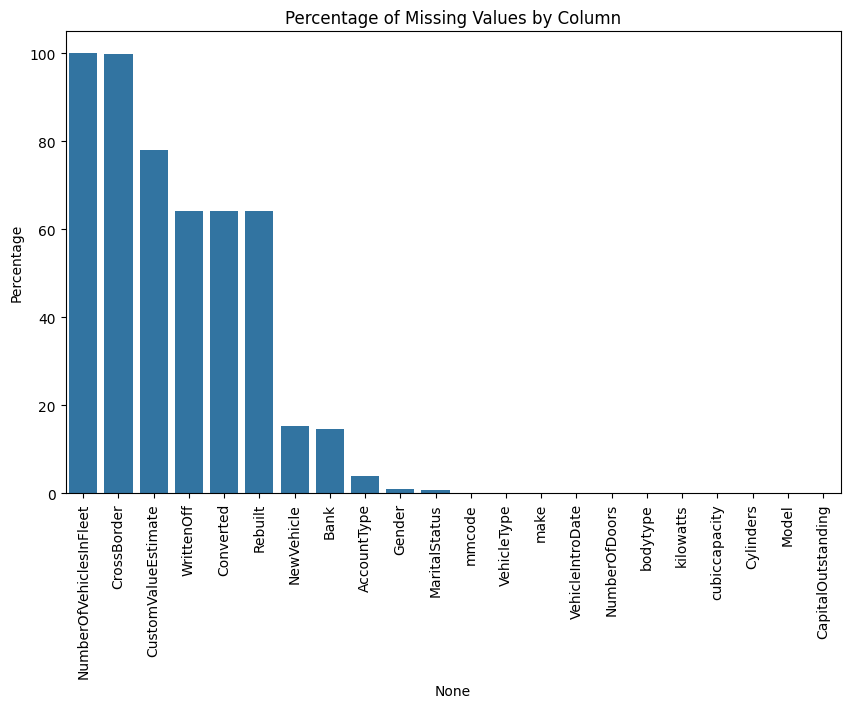

In [7]:
if df is not None:
    missing_report = missing_value_report(df)
    print(missing_report)

    if not missing_report.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_report.index, y=missing_report['Percent'])
        plt.xticks(rotation=90)
        plt.title('Percentage of Missing Values by Column')
        plt.ylabel('Percentage')
        plt.show()

## Descriptive Statistics

In [8]:
if df is not None:
    stats = summarize_numeric(df)
    display(stats)


--- Numeric Summary ---


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


### Interpretation
1. TotalClaims Analysis
Mean vs Max Disparity: The average claim is ZAR 64.86, but the maximum claim is ZAR 393,092 - a 6,060x difference, indicating extreme outlier claims that severely distort the average.

Zero Claims Dominance: With a median of ZAR 0 and 75th percentile of ZAR 0, over 75% of policies have no claims, suggesting most policies are profitable on a claims basis.

Negative Claims Anomaly: Minimum claim is -ZAR 12,002, which could indicate claim reversals or data entry errors needing investigation.

2. TotalPremium Analysis
Profitability Indicator: Average premium (ZAR 61.91) slightly exceeds average claims (ZAR 64.86), suggesting a thin or negative margin at portfolio level.

Premium Collection Issues: 25% of policies show ZAR 0 premium, indicating potential lapses, cancellations, or data quality issues.

Premium Range: Premiums range from -ZAR 782 (refunds/credits) to ZAR 65,282, showing high variability in policy pricing.

3. SumInsured Analysis
Wide Value Spread: Values range from ZAR 0.01 to ZAR 12.6 million with a standard deviation of ZAR 1.5 million, indicating extreme heterogeneity in insured asset values.

Major Outlier Presence: The maximum sum insured (ZAR 12.6M) is 20x higher than the mean (ZAR 604K), suggesting a few high-value assets skew the portfolio.

Concentration Risk: 75% of policies are below ZAR 250K, while the top 25% represent disproportionately high insured values, creating potential concentration risk.



## Outlier Detection

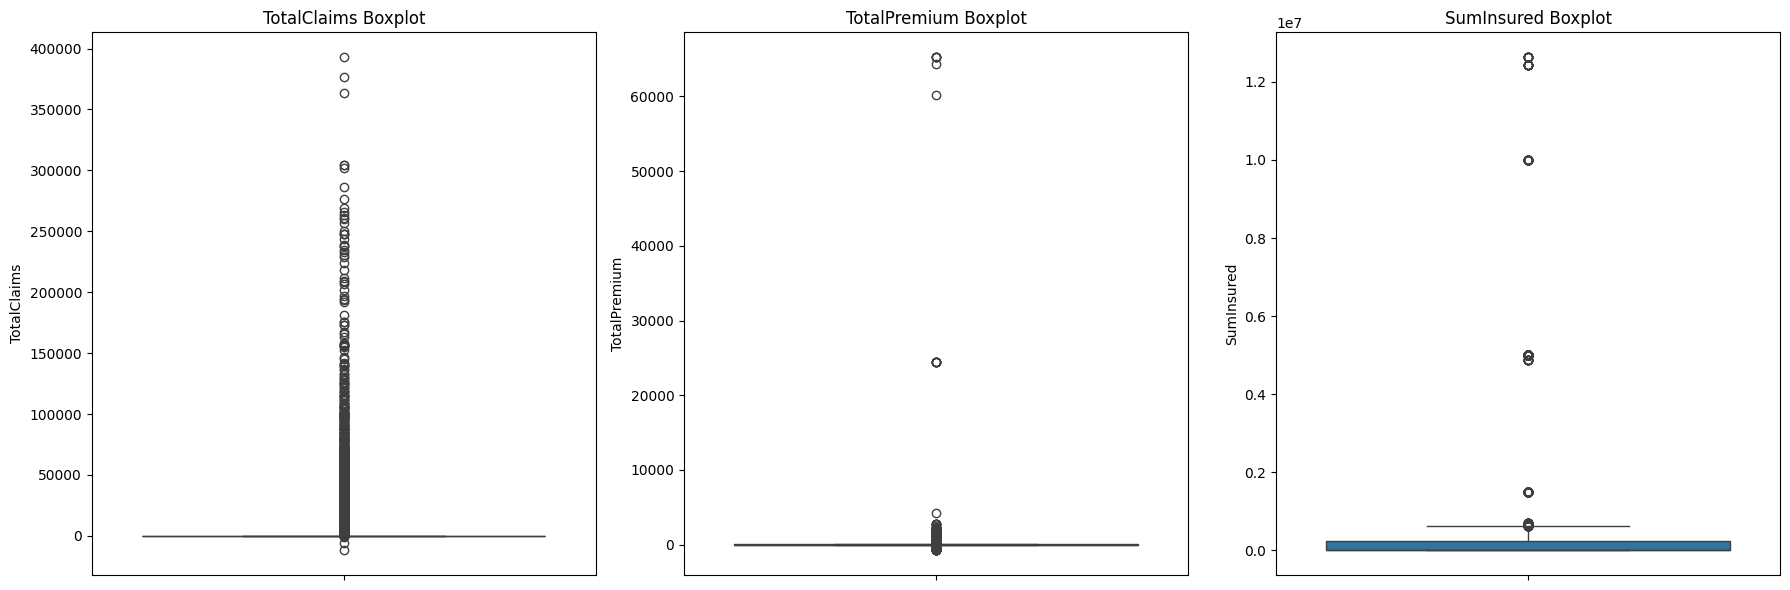

In [9]:
if df is not None:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.boxplot(y=df['TotalClaims'], ax=axes[0])
    axes[0].set_title('TotalClaims Boxplot')

    sns.boxplot(y=df['TotalPremium'], ax=axes[1])
    axes[1].set_title('TotalPremium Boxplot')

    sns.boxplot(y=df['SumInsured'], ax=axes[2])
    axes[2].set_title('SumInsured Boxplot')

    plt.tight_layout()
    plt.show()

## Correlation Analysis

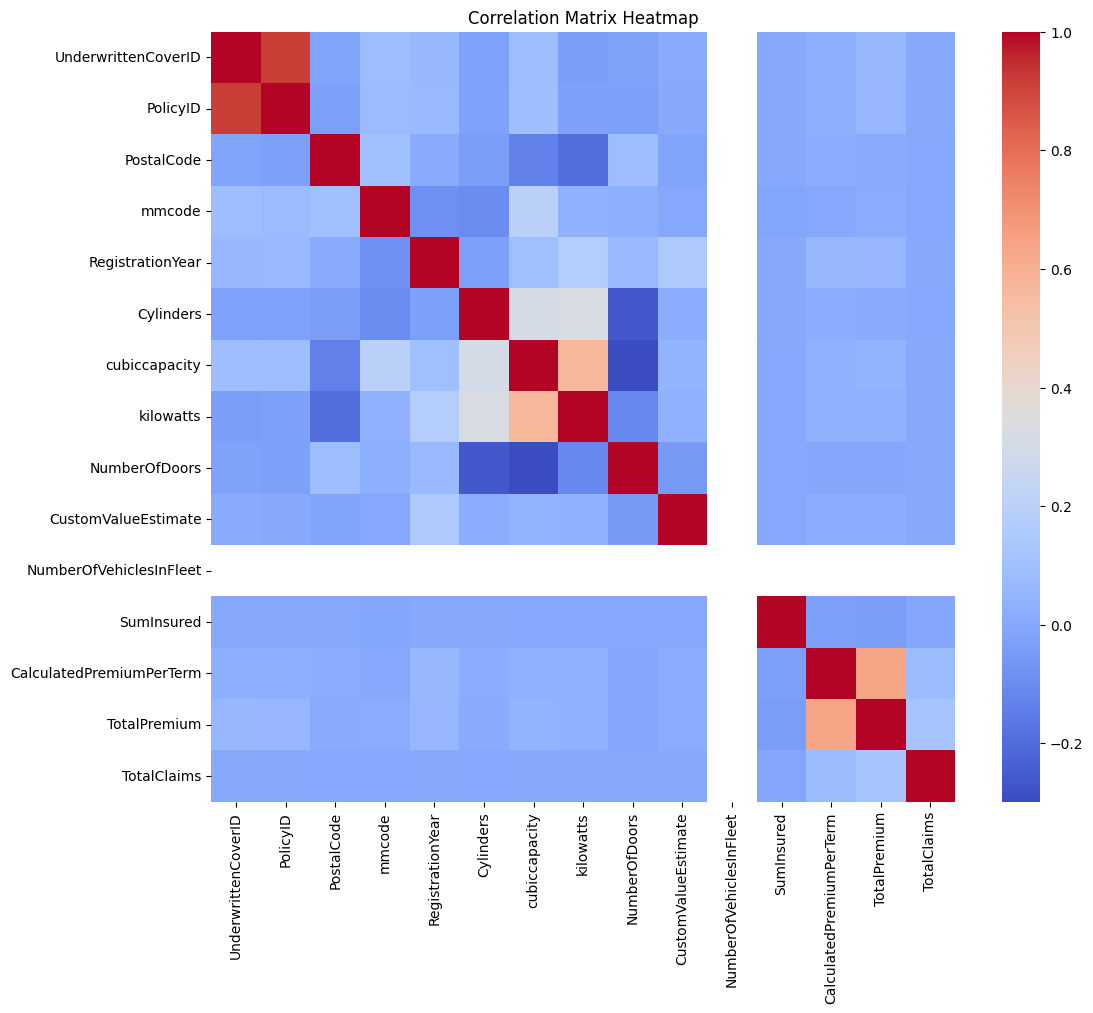

In [10]:
if df is not None:
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

## Creative Visualizations

In [11]:
if df is not None:
    top_creative_plots(df)

Saved monthly_trend.png to outputs/eda
Saved loss_ratio_province.png to outputs/eda


<Figure size 1200x600 with 0 Axes>